In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(xTrain,yTrain),(xTest,yTest) = cifar10.load_data()

170500096/170498071 [==============================] - 219s 1us/step


In [4]:
xTrain.shape

(50000, 32, 32, 3)

In [5]:
xTest.shape

(10000, 32, 32, 3)

In [6]:
xTrain.max()

255

In [9]:
xTrain = xTrain/255

In [10]:
xTest = xTest/255

In [11]:
yTrain.shape

(50000, 1)

In [12]:
yTest.shape

(10000, 1)

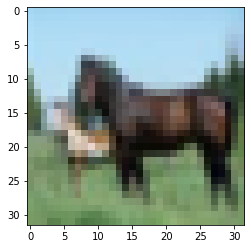

In [14]:
plt.imshow(xTrain[12])

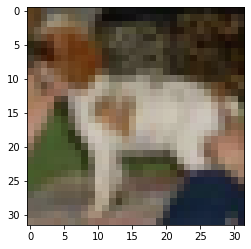

In [15]:
plt.imshow(xTest[12])

In [16]:
from keras.utils import to_categorical

In [17]:
y_test = to_categorical(yTest)

In [18]:
y_train = to_categorical(yTrain)

In [19]:
y_train.shape

(50000, 10)

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [40]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),strides = (1,1),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),strides = (1,1),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_8 (Dense)              (None, 100)              

In [42]:
from keras.callbacks import EarlyStopping

In [43]:
call = EarlyStopping(patience=2,monitor='val_loss',verbose=0)

In [44]:
model.fit(xTrain,y_train,callbacks=[call],validation_data=[xTest,y_test],verbose=2,epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
 - 50s - loss: 1.5311 - accuracy: 0.4391 - val_loss: 1.3001 - val_accuracy: 0.5299
Epoch 2/15
 - 52s - loss: 1.2131 - accuracy: 0.5690 - val_loss: 1.1780 - val_accuracy: 0.5875
Epoch 3/15
 - 51s - loss: 1.0789 - accuracy: 0.6203 - val_loss: 1.1301 - val_accuracy: 0.6102
Epoch 4/15
 - 50s - loss: 0.9773 - accuracy: 0.6572 - val_loss: 1.0364 - val_accuracy: 0.6309
Epoch 5/15
 - 48s - loss: 0.8949 - accuracy: 0.6842 - val_loss: 1.0285 - val_accuracy: 0.6443
Epoch 6/15
 - 49s - loss: 0.8213 - accuracy: 0.7125 - val_loss: 1.0768 - val_accuracy: 0.6315
Epoch 7/15
 - 48s - loss: 0.7562 - accuracy: 0.7324 - val_loss: 1.0694 - val_accuracy: 0.6475


In [45]:
model.evaluate(xTrain,y_train)

50000/50000 [==============================] - 10s 200us/step


[0.7141653130340576, 0.7481799721717834]

In [46]:
model.evaluate(xTest,y_test)

10000/10000 [==============================] - 2s 198us/step


[1.0694306730270386, 0.6474999785423279]

In [47]:
his = pd.DataFrame(model.history.history)

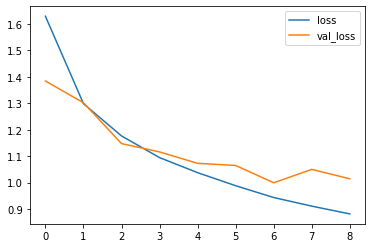

In [37]:
his[['loss','val_loss']].plot()

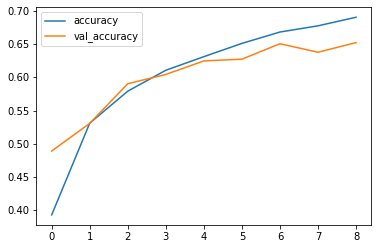

In [38]:
his[['accuracy','val_accuracy']].plot()

In [59]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [54]:
pred = model.predict_classes(xTest)

In [56]:
pred

array([3, 1, 8, ..., 2, 1, 7])

In [58]:
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1000
           1       0.73      0.81      0.77      1000
           2       0.51      0.56      0.53      1000
           3       0.47      0.41      0.44      1000
           4       0.65      0.54      0.59      1000
           5       0.60      0.48      0.53      1000
           6       0.62      0.83      0.71      1000
           7       0.83      0.62      0.71      1000
           8       0.69      0.83      0.75      1000
           9       0.69      0.74      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000



In [64]:
confusion_matrix(yTest,pred)

array([[644,  29,  71,   9,  13,   3,   7,   4, 155,  65],
       [ 15, 810,   3,   9,   0,   3,  12,   1,  45, 102],
       [ 68,  21, 558,  70,  76,  50, 103,  23,  22,   9],
       [ 27,  33, 102, 408,  57, 153, 140,  18,  32,  30],
       [ 26,  15, 123,  74, 541,  25, 113,  43,  22,  18],
       [ 23,  22, 106, 167,  50, 482,  86,  27,  22,  15],
       [ 13,  16,  43,  43,  24,  12, 833,   1,  11,   4],
       [ 32,  21,  47,  59,  60,  69,  30, 621,   8,  53],
       [ 48,  30,  24,  13,   5,   6,   4,   1, 833,  36],
       [ 25, 119,  12,  12,   1,   3,  14,  11,  58, 745]])

In [67]:
print(accuracy_score(yTest,pred))

0.6475
